<a href="https://colab.research.google.com/github/JhaAkansha/F1Predictor/blob/main/F1_Race_Winner_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#install poetry for python: https://github.com/elise-chin/poetry-and-colab/blob/main/Using_python_poetry_in_Google_Colab.ipynb
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
import requests

In [4]:
def driver_standings_season(season: str):
  base_url = f'https://api.jolpi.ca/ergast/f1/{season}/driverstandings/'
  return getData(base_url)

In [5]:
def drivers_with_fastest_lap():
  base_url = f'https://api.jolpi.ca/ergast/f1/fastest/1/drivers/'
  return getData(base_url)

In [6]:
def drivers_with_pole_position():
  base_url = f'https://api.jolpi.ca/ergast/f1/grid/1/drivers/'
  return getData(base_url)

In [7]:
def drivers_winners():
  base_url = f'https://api.jolpi.ca/ergast/f1/results/1/drivers/'
  return getData(base_url)

In [8]:
def driver_standings_after_nth_round(season: str, round: str):
  base_url = f'https://api.jolpi.ca/ergast/f1/{season}/{round}/driverstandings/'
  return getData(base_url)

In [9]:
def driver_champion(season: str):
  base_url = f'https://api.jolpi.ca/ergast/f1/{season}/driverstandings/1/'
  return getData(base_url)

In [13]:
print(driver_standings_after_nth_round(2024, 5))

[]


In [14]:
print(driver_champion(1997))

[]


In [15]:
def pitstops_season(season: str, round: str):
  base_url = f'https://api.jolpi.ca/ergast/f1/{season}/{round}/pitstops'
  return getData(base_url)
pitstops_season(2023, 13)

[]

In [16]:
def pitstops_season_round_driver(season: str, round: str, driver: str):
  base_url = f'https://api.jolpi.ca/ergast/f1/{season}/{round}/drivers/{driver}/pitstops'
  return getData(base_url)

In [17]:
def races_in_a_season(season: str):
  base_url = f'https://api.jolpi.ca/ergast/f1/{season}/races/'
  return getData(base_url)

In [18]:
def roundwise_result(season: str, round: str):
  base_url = f'https://api.jolpi.ca/ergast/f1/{season}/{round}/results'
  return getData(base_url)

In [19]:
roundwise_result(2024, 5)

[]

In [20]:
def pole_sitter_race_finish():
  base_url = f'https://api.jolpi.ca/ergast/f1/2024/grid/1/results/'
  return getData(base_url)

In [21]:
#without pagination
def temp (season: str, round: str):
  url = f'https://api.jolpi.ca/ergast/f1/{season}/{round}/laps/'
  response = requests.get(url).json()
  return response['MRData']
temp(2024, 8)

{'xmlns': '',
 'series': 'f1',
 'url': 'http://api.jolpi.ca/ergast/f1/2024/8/laps/',
 'limit': '30',
 'offset': '0',
 'total': '1233',
 'RaceTable': {'season': '2024',
  'round': '8',
  'Races': [{'season': '2024',
    'round': '8',
    'url': 'https://en.wikipedia.org/wiki/2024_Monaco_Grand_Prix',
    'raceName': 'Monaco Grand Prix',
    'Circuit': {'circuitId': 'monaco',
     'url': 'https://en.wikipedia.org/wiki/Circuit_de_Monaco',
     'circuitName': 'Circuit de Monaco',
     'Location': {'lat': '43.7347',
      'long': '7.42056',
      'locality': 'Monte-Carlo',
      'country': 'Monaco'}},
    'date': '2024-05-26',
    'time': '13:00:00Z',
    'Laps': [{'number': '1',
      'Timings': [{'driverId': 'leclerc',
        'position': '1',
        'time': '40:56.330'},
       {'driverId': 'piastri', 'position': '2', 'time': '40:58.744'},
       {'driverId': 'sainz', 'position': '3', 'time': '41:02.721'},
       {'driverId': 'norris', 'position': '4', 'time': '41:08.042'},
       {'driv

In [6]:
def getData(base_url: str):
  limit = 100
  offset = 0
  getTotal = requests.get(f'{base_url}?limit=1&offset=0').json()
  total = getTotal['MRData']['total']
  all_data = []
  while (offset <= int(total)):
    url = f'{base_url}?limit={limit}&offset={offset}'
    response = requests.get(url).json()
    race_data = response['MRData'].get('RaceTable', {}).get('Races', [])
    for race in race_data:
      laps = race.get('Laps', [])
      all_data.extend(laps)
    offset += limit
  return all_data

In [7]:
def lap_info_per_round(season: str, round: str):
  base_url = f'https://api.jolpi.ca/ergast/f1/{season}/{round}/laps.json'
  return getData(base_url)

In [8]:
monaco = lap_info_per_round(2024, 8)
print(monaco)

[{'number': '1', 'Timings': [{'driverId': 'leclerc', 'position': '1', 'time': '40:56.330'}, {'driverId': 'piastri', 'position': '2', 'time': '40:58.744'}, {'driverId': 'sainz', 'position': '3', 'time': '41:02.721'}, {'driverId': 'norris', 'position': '4', 'time': '41:08.042'}, {'driverId': 'russell', 'position': '5', 'time': '41:13.884'}, {'driverId': 'max_verstappen', 'position': '6', 'time': '41:18.944'}, {'driverId': 'hamilton', 'position': '7', 'time': '41:23.804'}, {'driverId': 'tsunoda', 'position': '8', 'time': '41:28.609'}, {'driverId': 'albon', 'position': '9', 'time': '41:34.817'}, {'driverId': 'gasly', 'position': '10', 'time': '41:37.695'}, {'driverId': 'stroll', 'position': '11', 'time': '41:42.648'}, {'driverId': 'ricciardo', 'position': '12', 'time': '41:47.607'}, {'driverId': 'alonso', 'position': '13', 'time': '41:53.184'}, {'driverId': 'sargeant', 'position': '14', 'time': '41:56.858'}, {'driverId': 'bottas', 'position': '15', 'time': '42:01.748'}, {'driverId': 'zhou'

In [9]:
len(monaco)

87

In [10]:
abu_dhabi = lap_info_per_round(2024, 24)
len(abu_dhabi)

67

In [11]:
print(abu_dhabi)

[{'number': '1', 'Timings': [{'driverId': 'norris', 'position': '1', 'time': '1:31.142'}, {'driverId': 'sainz', 'position': '2', 'time': '1:32.999'}, {'driverId': 'gasly', 'position': '3', 'time': '1:33.984'}, {'driverId': 'russell', 'position': '4', 'time': '1:34.679'}, {'driverId': 'hulkenberg', 'position': '5', 'time': '1:35.498'}, {'driverId': 'alonso', 'position': '6', 'time': '1:36.166'}, {'driverId': 'kevin_magnussen', 'position': '7', 'time': '1:36.949'}, {'driverId': 'leclerc', 'position': '8', 'time': '1:37.644'}, {'driverId': 'stroll', 'position': '9', 'time': '1:38.324'}, {'driverId': 'lawson', 'position': '10', 'time': '1:39.017'}, {'driverId': 'max_verstappen', 'position': '11', 'time': '1:39.510'}, {'driverId': 'hamilton', 'position': '12', 'time': '1:39.884'}, {'driverId': 'bottas', 'position': '13', 'time': '1:40.183'}, {'driverId': 'zhou', 'position': '14', 'time': '1:40.718'}, {'driverId': 'albon', 'position': '15', 'time': '1:41.190'}, {'driverId': 'doohan', 'positi

In [12]:
import pandas as pd

rounds = 24
lap_df = pd.DataFrame()

for i in range(1, rounds + 1):
    race = lap_info_per_round(2024, i)
    race_df = pd.DataFrame(race)
    race_df['Season'] = '2024'
    race_df['Round'] = i
    race_df = race_df[['Season', 'Round'] + [col for col in race_df.columns if col not in ['Season', 'Round']]]
    lap_df = pd.concat([lap_df, race_df], ignore_index=True)

In [13]:
print(lap_df)

     Season  Round number                                            Timings
0      2024      1      1  [{'driverId': 'max_verstappen', 'position': '1...
1      2024      1      2  [{'driverId': 'max_verstappen', 'position': '1...
2      2024      1      3  [{'driverId': 'max_verstappen', 'position': '1...
3      2024      1      4  [{'driverId': 'max_verstappen', 'position': '1...
4      2024      1      5  [{'driverId': 'max_verstappen', 'position': '1...
...     ...    ...    ...                                                ...
1599   2024     24     55  [{'driverId': 'norris', 'position': '1', 'time...
1600   2024     24     56  [{'driverId': 'norris', 'position': '1', 'time...
1601   2024     24     56  [{'driverId': 'piastri', 'position': '10', 'ti...
1602   2024     24     57  [{'driverId': 'norris', 'position': '1', 'time...
1603   2024     24     58  [{'driverId': 'norris', 'position': '1', 'time...

[1604 rows x 4 columns]


In [14]:
#Split Timings Column
df_exploded = lap_df.explode('Timings', ignore_index=True)
df_normalized = pd.json_normalize(df_exploded['Timings'])
df_exploded = df_exploded.drop(columns=['Timings'])
df_result = pd.concat([df_exploded, df_normalized], axis=1)

In [15]:
print(df_result)

      Season  Round number        driverId position      time
0       2024      1      1  max_verstappen        1  1:37.284
1       2024      1      1         leclerc        2  1:38.271
2       2024      1      1         russell        3  1:39.228
3       2024      1      1           perez        4  1:40.053
4       2024      1      1           sainz        5  1:40.620
...      ...    ...    ...             ...      ...       ...
26569   2024     24     58  max_verstappen        6  1:28.780
26570   2024     24     58           gasly        7  1:30.865
26571   2024     24     58      hulkenberg        8  1:30.040
26572   2024     24     58          alonso        9  1:28.621
26573   2024     24     58         piastri       10  1:28.010

[26574 rows x 6 columns]


In [16]:
lap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   1604 non-null   object
 1   Round    1604 non-null   int64 
 2   number   1604 non-null   object
 3   Timings  1604 non-null   object
dtypes: int64(1), object(3)
memory usage: 50.3+ KB


In [17]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26574 entries, 0 to 26573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    26574 non-null  object
 1   Round     26574 non-null  int64 
 2   number    26574 non-null  object
 3   driverId  26574 non-null  object
 4   position  26574 non-null  object
 5   time      26574 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


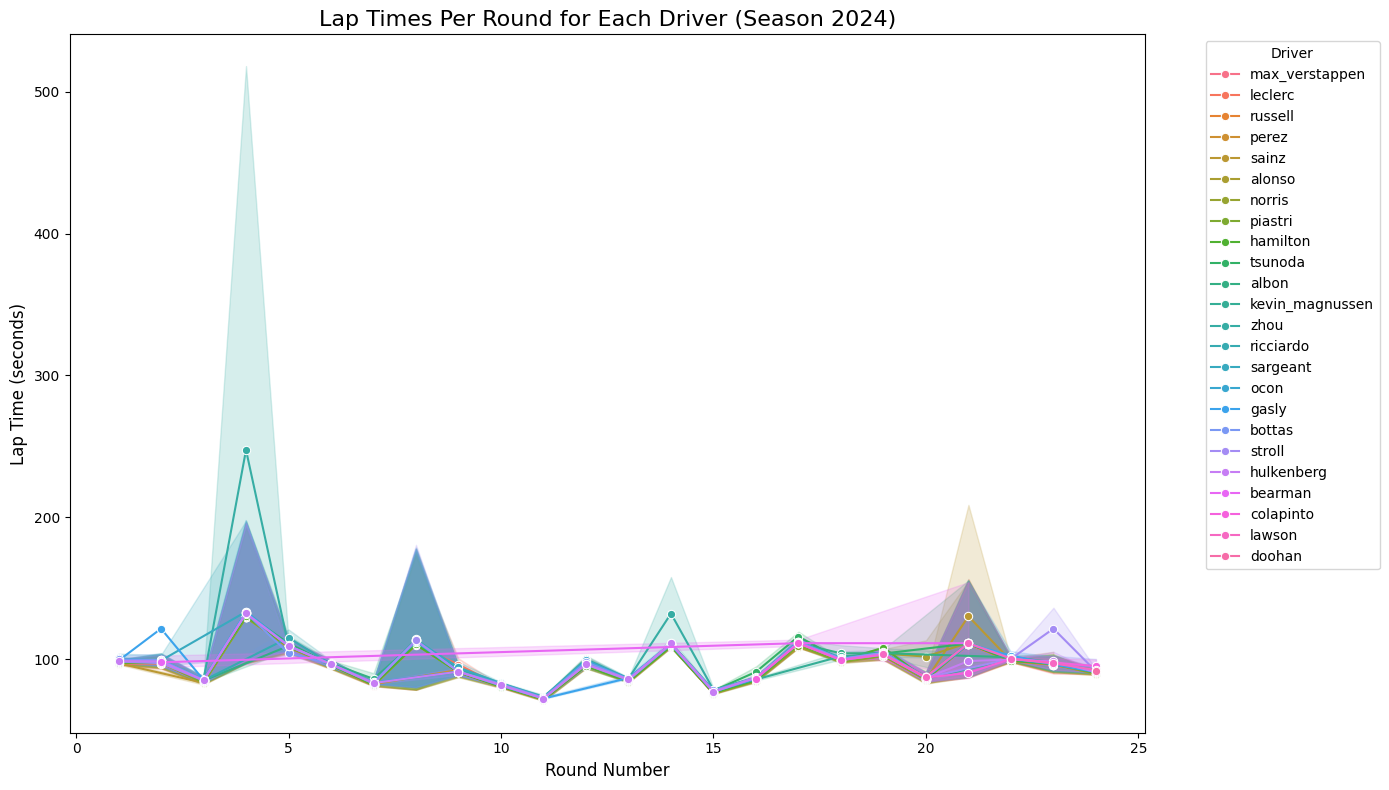

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df_result
# First, convert the 'time' column into seconds to facilitate plotting
def time_to_seconds(time_str):
    minutes, seconds = time_str.split(':')
    return float(minutes) * 60 + float(seconds)

# Convert the 'time' column to numeric (seconds)
df_result['time_seconds'] = df_result['time'].apply(time_to_seconds)

# Now, you can plot the round-wise lap times for each driver
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot for each driver, showing lap times per round
sns.lineplot(data=df_result, x='Round', y='time_seconds', hue='driverId', marker='o')

# Customize the plot
plt.title('Lap Times Per Round for Each Driver (Season 2024)', fontsize=16)
plt.xlabel('Round Number', fontsize=12)
plt.ylabel('Lap Time (seconds)', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df_result
# First, convert the 'time' column into seconds to facilitate plotting
def time_to_seconds(time_str):
    minutes, seconds = time_str.split(':')
    return float(minutes) * 60 + float(seconds)

# Convert the 'time' column to numeric (seconds)
df_result['time_seconds'] = df_result['time'].apply(time_to_seconds)

# Get the unique rounds from the dataset
rounds = df_result['Round'].unique()

# Plot lap times for each round
for round_num in rounds:
    round_data = df_result[df_result['Round'] == round_num]

    plt.figure(figsize=(10, 6))

    # Plotting lap times for all drivers in the current round
    sns.barplot(data=round_data, x='driverId', y='time_seconds')

    # Customizing the plot
    plt.title(f'Lap Times for Round {round_num} (Season 2024)', fontsize=16)
    plt.xlabel('Driver', fontsize=12)
    plt.ylabel('Lap Time (seconds)', fontsize=12)
    plt.xticks(rotation=45)  # Rotate driver names for better visibility

    # Add text annotations on top of the bars
    for index, row in round_data.iterrows():
        plt.text(index, row['time_seconds'] + 0.05, f'{row["time"]}', ha='center', va='bottom', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()


NameError: name 'df_result' is not defined